In [25]:
%reset -f
%matplotlib inline

In [26]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [27]:
pd.options.display.float_format = "{:.4f}".format

In [28]:
train = pd.read_csv("data/mnist/train.csv", sep = ",")

In [29]:
x = train[train.columns[1:]].values / 255.0
y = train.label.values

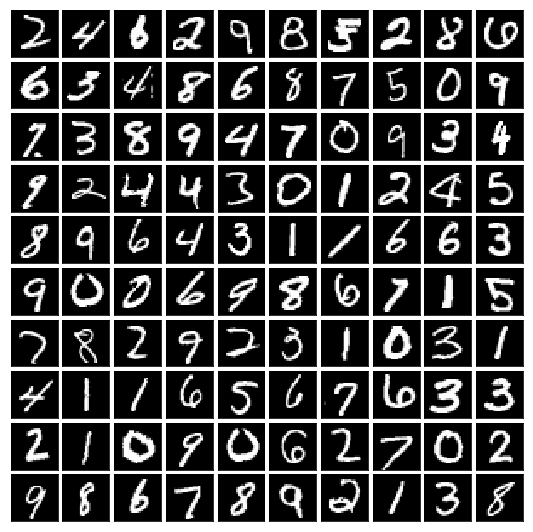

In [30]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

for i in range(nrows):
    for j in range(ncols):
        k   = np.random.randint(0, 5000)
        img = x[k].reshape(28, 28)
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [31]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 90.0)

In [32]:
model = sbbml.LogisticClassifier(
    alpha = 0.60, 
    iterations = 1000, 
    normalize = False
)
model.fit(x_train, y_train)

In [33]:
y_prime = model.predict(x_test)
utils.accuracy(y_prime, y_test)

0.9121428571428571

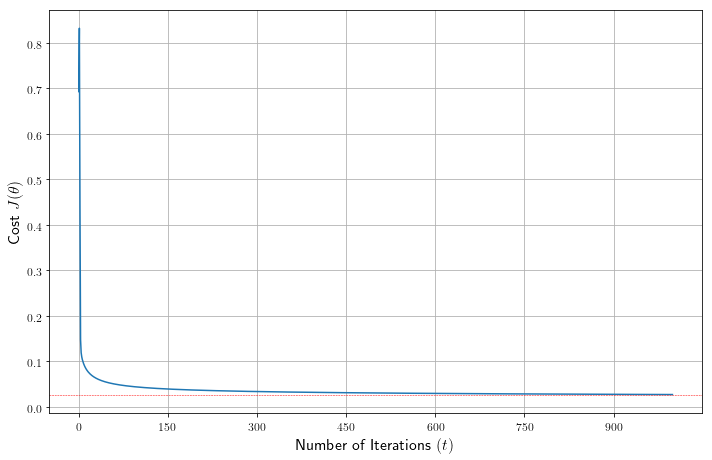

In [34]:
utils.plot_cost_function(cost = model.cost[0], width = 10.0, height = 6.5)

In [35]:
test = pd.read_csv("data/mnist/test.csv", sep = ",")
x_test = test.values / 255.0
y_prime = model.predict(x_test).flatten()

In [36]:
with open("data/mnist/logistic-submission.csv", mode = "w") as f:
    f.write("ImageId,Label\n")
    for i in range(y_prime.shape[0]):
        f.write(f"{i + 1},{int(y_prime[i])}\n")